<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220618_Omicron_Sentiment_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/12/06/omicron-sentiment-analysis-using-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Ironhack/DBs/omicron.csv')

In [8]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,2,1,False
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17046 entries, 0 to 17045
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                17046 non-null  int64 
 1   user_name         17046 non-null  object
 2   user_location     13434 non-null  object
 3   user_description  15716 non-null  object
 4   user_created      17046 non-null  object
 5   user_followers    17046 non-null  int64 
 6   user_friends      17046 non-null  int64 
 7   user_favourites   17046 non-null  int64 
 8   user_verified     17046 non-null  bool  
 9   date              17046 non-null  object
 10  text              17046 non-null  object
 11  hashtags          10219 non-null  object
 12  source            17046 non-null  object
 13  retweets          17046 non-null  int64 
 14  favorites         17046 non-null  int64 
 15  is_retweet        17046 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.9+ MB


In [10]:
data.isnull().sum()

id                     0
user_name              0
user_location       3612
user_description    1330
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            6827
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7575 entries, 1 to 17045
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                7575 non-null   int64 
 1   user_name         7575 non-null   object
 2   user_location     7575 non-null   object
 3   user_description  7575 non-null   object
 4   user_created      7575 non-null   object
 5   user_followers    7575 non-null   int64 
 6   user_friends      7575 non-null   int64 
 7   user_favourites   7575 non-null   int64 
 8   user_verified     7575 non-null   bool  
 9   date              7575 non-null   object
 10  text              7575 non-null   object
 11  hashtags          7575 non-null   object
 12  source            7575 non-null   object
 13  retweets          7575 non-null   int64 
 14  favorites         7575 non-null   int64 
 15  is_retweet        7575 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 902.5+ KB


In [13]:
import re
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
def clean(text):
  text = str(text).lower()
  text = re.sub(r'\[.*?\]', '', text)
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  text = re.sub(r'<.*?>+', '', text)
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = ' '.join(text)
  return text

In [36]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False
5,1491839121949614082,Wont_Back_Down,State 48,Wife Mom #MSULaw lawyer nuked by the Blue Bird...,2021-11-25 19:33:12,116,215,1468,False,2022-02-10 18:18:58,Doctor Who Helped Discover #Omicron Says She W...,['Omicron'],Twitter for iPhone,0,0,False
8,1491838505777090560,🄳🄰🅅🄸🅂 ④⓪④ Cassandratic Equations,Chicago,"I was born, probably. Scientician, drew stuff,...",2011-09-11 03:00:28,523,737,80023,False,2022-02-10 18:16:31,"This month, Tonga finally has #Omicron.\n106,0...",['Omicron'],Twitter for Android,0,0,False
11,1491838157591130113,Best Health 4 You,Planet Earth,"Promoting healthy, natural supplements and mor...",2013-07-06 19:54:34,408,49,17970,False,2022-02-10 18:15:08,#Covid #pandemic continues in #Ukraine as case...,"['Covid', 'pandemic', 'Ukraine', 'Omicron']",Twitter Web App,0,0,False


In [35]:
for i in range(0, 20):
  try:
    print(data['text'][i])
  except:
    print('null value')

null value
@Yascha_Mounk #CDC says number of fully #vaccinated #Omicron patients in #hospital rose from 25% to 40%:
https://t.co/QeU3ZINCuC
null value
null value
With the #Beijing2022 #WinterOlympics already underway U.S. #olympians are looking to travel #security firms to pro… https://t.co/h4EuqkK2Np
Doctor Who Helped Discover #Omicron Says She Was Pressured Not to Reveal It’s Mild https://t.co/6XnjUU5R21 via @epochtimes
null value
null value
This month, Tonga finally has #Omicron.
106,000 people.
88% single vaxxed.
98% double tapped.
A few just sick.
No d… https://t.co/ZcjG8eyJNA
null value
null value
#Covid #pandemic continues in #Ukraine as cases are rapidly on the rise due to #Omicron. Many schools switched to… https://t.co/EHGPPHtCJQ
#COVID in the #EuropeanUnion: notifications of new cases are still very high 😷

This is no time to let your guard d… https://t.co/76ejyi13Lp
null value
null value
null value
null value
#Omicron’s Decline Prompts Rethink of #Covid19 Measures https://t

In [37]:
data['text'] = data['text'].apply(clean)

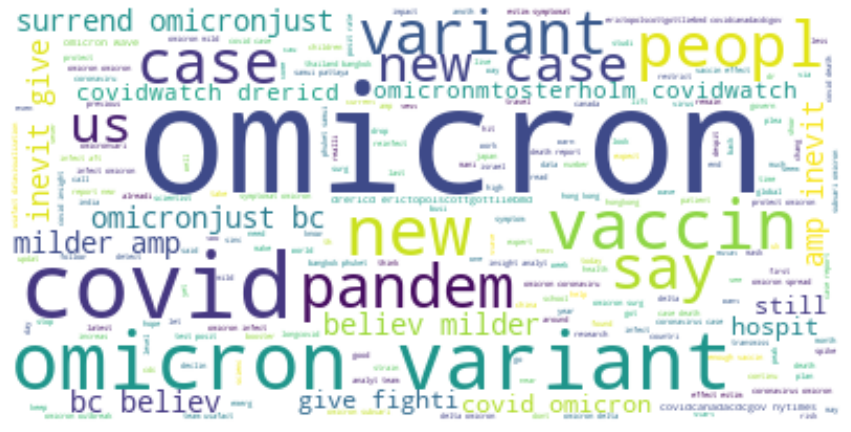

In [38]:
text = ' '.join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

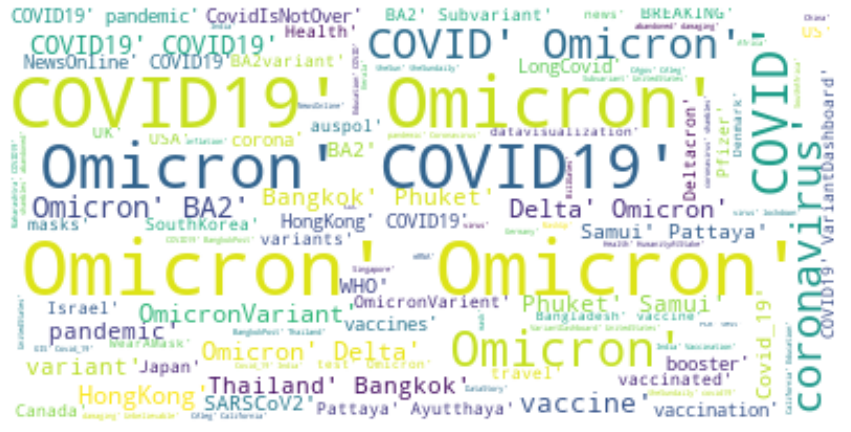

In [41]:
text = ' '.join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['text']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['text']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['text']]
data['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in data['text']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [44]:
data2 = data[['text', 'Positive', 'Negative', 'Neutral', 'Compound']]
data2.head()

,text,Positive,Negative,Neutral,Compound
1,yaschamounk cdc say number fulli vaccin omicro...,0.126,0.0,0.874,0.0772
4,winterolymp alreadi underway us olympian look...,0.000,0.0,1.000,0.0000
5,doctor help discov omicron say pressur reveal ...,0.213,0.0,0.787,0.4019
8,month tonga final singl doubl tappeda sickn...,0.000,0.0,1.000,0.0000
11,covid pandem continu ukrain case rapid rise du...,0.000,0.0,1.000,0.0000


In [45]:
x = sum(data['Positive'])
y = sum(data['Negative'])
z = sum(data['Neutral'])
j = sum(data['Compound'])

In [46]:
def sentiment_score(a,b,c):
  if (a>b) and (b>c):
    print('Positive')
  if (b>a) and (b>c):
    print('Negative')
  else:
    print('Neutral')

In [47]:
sentiment_score(x,y,z)

Neutral


In [48]:
print('Positive: ', x)
print('Negative: ', y)
print('Neutral: ', z)
print('Compound: ', j)

Positive:  487.614000000002
Negative:  521.6110000000003
Neutral:  6565.799999999975
Compound:  -106.39150000000113
